In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [32]:
# Set the parameters
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type = 'post'
oov_tok = "<OOV>"

# Load the IMDB Movie Reviews dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train_padded = pad_sequences(X_train, maxlen=max_length, truncating=trunc_type)
X_test_padded = pad_sequences(X_test, maxlen=max_length, truncating=trunc_type)

# Build the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_sequences(X_train_padded)

# Convert sequences to padded sequences
X_train_tokenized = pad_sequences(X_train_padded, maxlen=max_length)
X_test_tokenized = pad_sequences(X_test_padded, maxlen=max_length)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train_tokenized,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test_tokenized, y_test),
                    callbacks=[early_stopping]
                    )


Epoch 1/10
391/391 [==============================] - 54s 131ms/step - loss: 0.6914 - accuracy: 0.5275 - val_loss: 0.6830 - val_accuracy: 0.6444
Epoch 2/10
391/391 [==============================] - 51s 130ms/step - loss: 0.5255 - accuracy: 0.7606 - val_loss: 0.4342 - val_accuracy: 0.8180
Epoch 3/10
391/391 [==============================] - 52s 132ms/step - loss: 0.3808 - accuracy: 0.8512 - val_loss: 0.3711 - val_accuracy: 0.8437
Epoch 4/10
391/391 [==============================] - 51s 131ms/step - loss: 0.3282 - accuracy: 0.8780 - val_loss: 0.3534 - val_accuracy: 0.8513
Epoch 5/10
391/391 [==============================] - 52s 133ms/step - loss: 0.2960 - accuracy: 0.8932 - val_loss: 0.3386 - val_accuracy: 0.8541
Epoch 6/10
391/391 [==============================] - 50s 129ms/step - loss: 0.2754 - accuracy: 0.9050 - val_loss: 0.3419 - val_accuracy: 0.8564
Epoch 7/10
391/391 [==============================] - 52s 133ms/step - loss: 0.2536 - accuracy: 0.9116 - val_loss: 0.3479 - val_ac

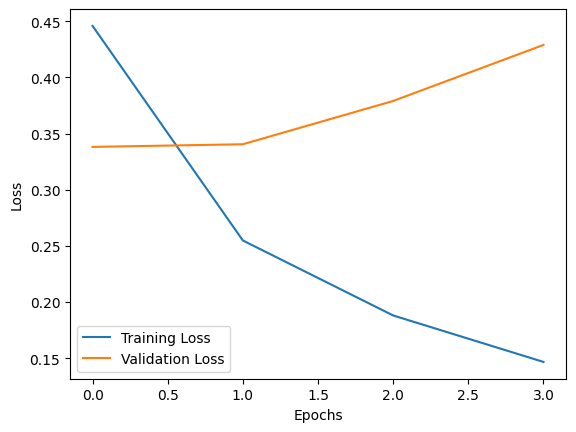

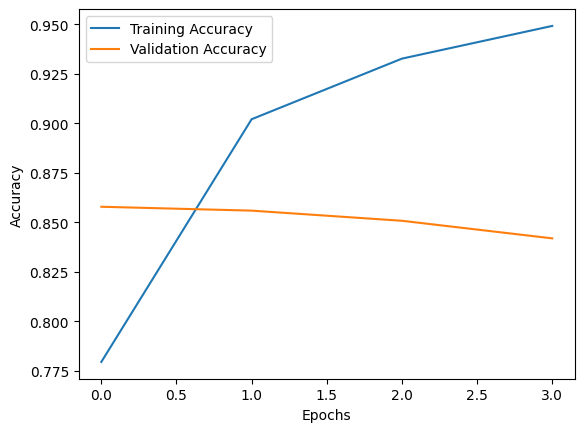

In [27]:
# Accessing training loss values
train_loss = history.history['loss']

# Accessing validation loss values
val_loss = history.history['val_loss']

# Accessing training accuracy values
train_accuracy = history.history['accuracy']

# Accessing validation accuracy values
val_accuracy = history.history['val_accuracy']

# Plotting the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

782/782 [==============================] - 23s 28ms/step


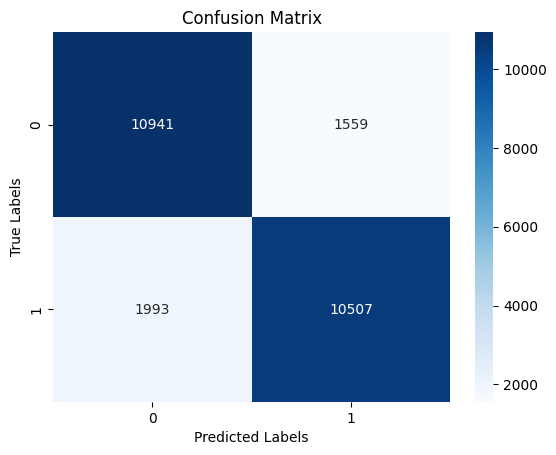

In [28]:
# Perform predictions
y_pred_prob = model.predict(X_test_tokenized)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob).astype(int)

# Calculate the confusion matrix
cm = np.zeros((2, 2))
for i in range(len(y_test)):
    true_label = int(y_test[i])
    pred_label = y_pred[i][0]
    cm[true_label][pred_label] += 1

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()